In [1]:
# Packages installed (pip)
# wordcloud, emoji==0.6.0, xformers, llama-index

In [2]:
import pandas as pd
import datetime as dt
import numpy as np

# Visualization Libraries
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns

# Transformer model
from transformers import pipeline

# **Import Data**

In [3]:
posts_networking_df = pd.read_csv('Networking_posts.csv')
comments_networking_df = pd.read_csv('Networking_comments.csv')

posts_velocloud_df = pd.read_csv('Velocloud_posts.csv')
comments_velocloud_df = pd.read_csv('Velocloud_comments.csv')

posts_sysadmin_df = pd.read_csv('Sysadmin_posts.csv')
comments_sysadmin_df = pd.read_csv('Sysadmin_comments.csv')

In [4]:
posts_networking_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97
1,7zauql,networking,1.519262e+09,I accepted an interview for Network Engineer p...,https://www.reddit.com/r/networking/comments/7...,I tricked a company into paying me too much fo...,NaN,1193,269,0.97
2,41j04h,networking,1.453125e+09,"I was tasked with setting up a captive portal,...",https://www.reddit.com/r/networking/comments/4...,WiFi guest access? You gotta touch the banana...,NaN,1151,303,0.95
3,818tjy,networking,1.519939e+09,https://www.wired.com/story/github-ddos-memcac...,https://www.reddit.com/r/networking/comments/8...,Github just survived a DDoS attack of over 1.3...,NaN,1082,141,0.97
4,4v4m1l,networking,1.469763e+09,The humor in this seems to pass over most of r...,https://www.reddit.com/r/networking/comments/4...,"Everyone at /r/the_donald, /r/conspiracy, and ...",NaN,1030,265,0.91
...,...,...,...,...,...,...,...,...,...,...
995,c1muga,networking,1.560774e+09,I've been using Salt to manage network gear fo...,https://www.reddit.com/r/networking/comments/c...,Network Automation using Salt and salt-sproxy,NaN,108,15,0.96
996,z1geqf,networking,1.669080e+09,I got my CCNA and I'm studying for my CCNP but...,https://www.reddit.com/r/networking/comments/z...,Are there any good resources for learning abou...,Design,104,36,0.91
997,tx1f2h,networking,1.649183e+09,"Hi /r/networking,\n\nI only have a few years w...",https://www.reddit.com/r/networking/comments/t...,Networking Design Knowledge,Other,106,29,0.94
998,13nfbqv,networking,1.684633e+09,CCIE takes lots of time and dedication. \nLet’...,https://www.reddit.com/r/networking/comments/1...,Is CCIE worth it,Career Advice,101,118,0.92


In [5]:
comments_networking_df

,post_id,comment
0,1zhrd6,How's it look now?
1,1zhrd6,1 4 ms <1 ms 9 ms Cisco76839 [19...
2,1zhrd6,Which ISP do you work for? I live in Seattle ...
3,1zhrd6,Howdy I am a resident in Duvall outside of Sea...
4,1zhrd6,Is it sad that this kind of made me tear up?
...,...,...
106213,ljh1nd,That's like saying you know football players m...
106214,ljh1nd,It's misleading because that's the exception r...
106215,ljh1nd,I find the 1000 person mark is large enough yo...
106216,ljh1nd,"I work in tech, we've had or have offices in B..."


In [6]:
posts_velocloud_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,ok6jqx,Velocloud,1.626276e+09,For those of you who are stuck behind an MSP b...,https://www.reddit.com/r/Velocloud/comments/ok...,Who is your MSP?,NaN,4,14,0.84
1,rhj3be,Velocloud,1.639631e+09,Details here: [VMSA-2021-0028.3 (vmware.com)]...,https://www.reddit.com/r/Velocloud/comments/rh...,Velocloud appears to be affected by Log4J,NaN,3,0,0.81
2,lkcwx2,Velocloud,1.613393e+09,"There are two options for HA, standard and Enh...",https://www.reddit.com/r/Velocloud/comments/lk...,Velocloud High Availability Options,NaN,4,15,1.00
3,zqyh4l,Velocloud,1.671567e+09,Anyone have experience working with branch to ...,https://www.reddit.com/r/Velocloud/comments/zq...,Branch to Branch VPN,NaN,3,2,1.00
4,yd9nym,Velocloud,1.666717e+09,A team used a blank cloud-init OVA to create a...,https://www.reddit.com/r/Velocloud/comments/yd...,Configure VCE from command line,NaN,3,7,1.00
...,...,...,...,...,...,...,...,...,...,...
105,he2y4m,Velocloud,1.592867e+09,"Hey all,\n\nCurrently reviewing options for se...",https://www.reddit.com/r/Velocloud/comments/he...,Facilitating Cloud Connectivity - Cloud-native...,NaN,1,2,1.00
106,glvimk,Velocloud,1.589780e+09,\[repost from r/vmware\]\n\n Trying to setup s...,https://www.reddit.com/r/Velocloud/comments/gl...,Where do I find VELOCLOUD-MIB ?,NaN,1,10,1.00
107,fqla33,Velocloud,1.585406e+09,Looking for training on Velocloud SDwan. Not f...,https://www.reddit.com/r/Velocloud/comments/fq...,Training?,NaN,1,1,1.00
108,fk9hbr,Velocloud,1.584467e+09,NaN,https://www.reddit.com/r/Velocloud/comments/fk...,is there any free lab where I could get some h...,NaN,1,2,1.00


In [7]:
comments_velocloud_df

,post_id,comment
0,ok6jqx,"It really depends. I‘m working for an MSP and,..."
1,ok6jqx,Not a fan of Rapidscale (Cox). Can’t wait for ...
2,ok6jqx,"We tried to start with Videns, but felt it fel..."
3,ok6jqx,Would love to hear about an actual MSP worth t...
4,ok6jqx,Who are you looking to replace them with?
...,...,...
379,ezxgq3,"Hi, yes there is a ssh Server running in the VCE."
380,ezxgq3,"You can SSH to the edge before activation, yes..."
381,ezxgq3,"I was trying to modify /etc/ssh/sshd\_config ,..."
382,ezxgq3,Before activation?


In [8]:
posts_sysadmin_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,zeo31j,sysadmin,1.670376e+09,About two years ago I started at a small/mediu...,https://www.reddit.com/r/sysadmin/comments/zeo...,I recently had to implement my disaster recove...,General Discussion,19829,697,0.97
1,wq5ja1,sysadmin,1.660684e+09,"Please, you're making me die on the inside. I ...",https://www.reddit.com/r/sysadmin/comments/wq5...,Dear MS Teams: Someone liking my comment in my...,Rant,18682,905,0.97
2,q181fv,sysadmin,1.633362e+09,Prepare for tickets complaining the internet i...,https://www.reddit.com/r/sysadmin/comments/q18...,Looks Like Facebook Is Down,Off Topic,15746,3369,0.91
3,7etxx7,sysadmin,1.511382e+09,"Alright folks, I think it's time we help fan t...",https://www.reddit.com/r/sysadmin/comments/7et...,"Net Neutrality, let's do our part. Who knows t...",NaN,14003,858,0.89
4,x82vnj,sysadmin,1.662551e+09,Hopefully other places will do the same.\n\nht...,https://www.reddit.com/r/sysadmin/comments/x82...,California passes bill requiring salary ranges...,NaN,12481,822,0.97
...,...,...,...,...,...,...,...,...,...,...
992,13xg30w,sysadmin,1.685622e+09,[https://www.ftc.gov/system/files/ftc\_gov/pdf...,https://www.reddit.com/r/sysadmin/comments/13x...,Amazon Ring IoT epic fail,NaN,1236,410,0.96
993,13ws5r6,sysadmin,1.685553e+09,"Asked Bard and ChatGPT each to: ""Write a Power...",https://www.reddit.com/r/sysadmin/comments/13w...,Bard doesn't give AF,General Discussion,1207,278,0.96
994,13uysws,sysadmin,1.685376e+09,Your time is scarce. If a person online doesn'...,https://www.reddit.com/r/sysadmin/comments/13u...,PSA: You Don't Have to Help Everybody In the C...,NaN,1179,166,0.92
995,14jfxzc,sysadmin,1.687782e+09,Ever since we started to work with and support...,https://www.reddit.com/r/sysadmin/comments/14j...,Waiting is becoming a legitimate solution for ...,NaN,1032,255,0.96


In [9]:
comments_sysadmin_df

,post_id,comment
0,zeo31j,"Had me going in the first half, I'll admit\n\n..."
1,zeo31j,Now THAT is a proper disaster recovery plan!
2,zeo31j,[deleted]
3,zeo31j,Got half way through the last paragraph and ki...
4,zeo31j,"This is the content I live for, good on you OP!"
...,...,...
511474,14eoyyx,You're the one crying about how you can't fix ...
511475,14eoyyx,"With our current level of technology, we canno..."
511476,14eoyyx,So have you done a single thing that I wrote a...
511477,14eoyyx,"Yes, and guess what; your brain doesn't do a f..."


In [10]:
# Convert created date to normal datetime
def convert_utc_to_date(posts_df):

    posts_df['created_date'] = posts_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
    posts_df['created_year'] = posts_df['created_date'].dt.year

    return posts_df

In [11]:
posts_networking_df = convert_utc_to_date(posts_networking_df)
posts_networking_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014
1,7zauql,networking,1.519262e+09,I accepted an interview for Network Engineer p...,https://www.reddit.com/r/networking/comments/7...,I tricked a company into paying me too much fo...,NaN,1193,269,0.97,2018-02-22 01:07:14,2018
2,41j04h,networking,1.453125e+09,"I was tasked with setting up a captive portal,...",https://www.reddit.com/r/networking/comments/4...,WiFi guest access? You gotta touch the banana...,NaN,1151,303,0.95,2016-01-18 13:47:40,2016
3,818tjy,networking,1.519939e+09,https://www.wired.com/story/github-ddos-memcac...,https://www.reddit.com/r/networking/comments/8...,Github just survived a DDoS attack of over 1.3...,NaN,1082,141,0.97,2018-03-01 21:15:02,2018
4,4v4m1l,networking,1.469763e+09,The humor in this seems to pass over most of r...,https://www.reddit.com/r/networking/comments/4...,"Everyone at /r/the_donald, /r/conspiracy, and ...",NaN,1030,265,0.91,2016-07-29 03:23:38,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
995,c1muga,networking,1.560774e+09,I've been using Salt to manage network gear fo...,https://www.reddit.com/r/networking/comments/c...,Network Automation using Salt and salt-sproxy,NaN,108,15,0.96,2019-06-17 12:19:26,2019
996,z1geqf,networking,1.669080e+09,I got my CCNA and I'm studying for my CCNP but...,https://www.reddit.com/r/networking/comments/z...,Are there any good resources for learning abou...,Design,104,36,0.91,2022-11-22 01:20:59,2022
997,tx1f2h,networking,1.649183e+09,"Hi /r/networking,\n\nI only have a few years w...",https://www.reddit.com/r/networking/comments/t...,Networking Design Knowledge,Other,106,29,0.94,2022-04-05 18:22:49,2022
998,13nfbqv,networking,1.684633e+09,CCIE takes lots of time and dedication. \nLet’...,https://www.reddit.com/r/networking/comments/1...,Is CCIE worth it,Career Advice,101,118,0.92,2023-05-21 01:39:50,2023


In [12]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="created_year", y="..count..", color="num_comments", fill="num_comments"), data=posts_networking_df, sampling="none" if posts_networking_df.size < 50 else sampling_pick(n=50)) + \
ggtitle("Number of posts in networking subreddit per year") 

In [13]:
posts_velocloud_df = convert_utc_to_date(posts_velocloud_df)
posts_velocloud_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,ok6jqx,Velocloud,1.626276e+09,For those of you who are stuck behind an MSP b...,https://www.reddit.com/r/Velocloud/comments/ok...,Who is your MSP?,NaN,4,14,0.84,2021-07-14 15:21:39,2021
1,rhj3be,Velocloud,1.639631e+09,Details here: [VMSA-2021-0028.3 (vmware.com)]...,https://www.reddit.com/r/Velocloud/comments/rh...,Velocloud appears to be affected by Log4J,NaN,3,0,0.81,2021-12-16 05:01:48,2021
2,lkcwx2,Velocloud,1.613393e+09,"There are two options for HA, standard and Enh...",https://www.reddit.com/r/Velocloud/comments/lk...,Velocloud High Availability Options,NaN,4,15,1.00,2021-02-15 12:41:11,2021
3,zqyh4l,Velocloud,1.671567e+09,Anyone have experience working with branch to ...,https://www.reddit.com/r/Velocloud/comments/zq...,Branch to Branch VPN,NaN,3,2,1.00,2022-12-20 20:17:55,2022
4,yd9nym,Velocloud,1.666717e+09,A team used a blank cloud-init OVA to create a...,https://www.reddit.com/r/Velocloud/comments/yd...,Configure VCE from command line,NaN,3,7,1.00,2022-10-25 16:53:16,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
105,he2y4m,Velocloud,1.592867e+09,"Hey all,\n\nCurrently reviewing options for se...",https://www.reddit.com/r/Velocloud/comments/he...,Facilitating Cloud Connectivity - Cloud-native...,NaN,1,2,1.00,2020-06-22 23:04:57,2020
106,glvimk,Velocloud,1.589780e+09,\[repost from r/vmware\]\n\n Trying to setup s...,https://www.reddit.com/r/Velocloud/comments/gl...,Where do I find VELOCLOUD-MIB ?,NaN,1,10,1.00,2020-05-18 05:41:11,2020
107,fqla33,Velocloud,1.585406e+09,Looking for training on Velocloud SDwan. Not f...,https://www.reddit.com/r/Velocloud/comments/fq...,Training?,NaN,1,1,1.00,2020-03-28 14:34:48,2020
108,fk9hbr,Velocloud,1.584467e+09,NaN,https://www.reddit.com/r/Velocloud/comments/fk...,is there any free lab where I could get some h...,NaN,1,2,1.00,2020-03-17 17:42:42,2020


In [14]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="created_year", y="..count..", color="num_comments", fill="num_comments"), data=posts_velocloud_df, sampling="none" if posts_velocloud_df.size < 50 else sampling_pick(n=50)) + \
ggtitle("Number of posts in Velocloud subreddit per year") 

In [15]:
posts_sysadmin_df = convert_utc_to_date(posts_sysadmin_df)
posts_sysadmin_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,zeo31j,sysadmin,1.670376e+09,About two years ago I started at a small/mediu...,https://www.reddit.com/r/sysadmin/comments/zeo...,I recently had to implement my disaster recove...,General Discussion,19829,697,0.97,2022-12-07 01:14:57,2022
1,wq5ja1,sysadmin,1.660684e+09,"Please, you're making me die on the inside. I ...",https://www.reddit.com/r/sysadmin/comments/wq5...,Dear MS Teams: Someone liking my comment in my...,Rant,18682,905,0.97,2022-08-16 21:02:23,2022
2,q181fv,sysadmin,1.633362e+09,Prepare for tickets complaining the internet i...,https://www.reddit.com/r/sysadmin/comments/q18...,Looks Like Facebook Is Down,Off Topic,15746,3369,0.91,2021-10-04 15:45:55,2021
3,7etxx7,sysadmin,1.511382e+09,"Alright folks, I think it's time we help fan t...",https://www.reddit.com/r/sysadmin/comments/7et...,"Net Neutrality, let's do our part. Who knows t...",NaN,14003,858,0.89,2017-11-22 20:20:44,2017
4,x82vnj,sysadmin,1.662551e+09,Hopefully other places will do the same.\n\nht...,https://www.reddit.com/r/sysadmin/comments/x82...,California passes bill requiring salary ranges...,NaN,12481,822,0.97,2022-09-07 11:39:21,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
992,13xg30w,sysadmin,1.685622e+09,[https://www.ftc.gov/system/files/ftc\_gov/pdf...,https://www.reddit.com/r/sysadmin/comments/13x...,Amazon Ring IoT epic fail,NaN,1236,410,0.96,2023-06-01 12:18:56,2023
993,13ws5r6,sysadmin,1.685553e+09,"Asked Bard and ChatGPT each to: ""Write a Power...",https://www.reddit.com/r/sysadmin/comments/13w...,Bard doesn't give AF,General Discussion,1207,278,0.96,2023-05-31 17:14:46,2023
994,13uysws,sysadmin,1.685376e+09,Your time is scarce. If a person online doesn'...,https://www.reddit.com/r/sysadmin/comments/13u...,PSA: You Don't Have to Help Everybody In the C...,NaN,1179,166,0.92,2023-05-29 16:00:34,2023
995,14jfxzc,sysadmin,1.687782e+09,Ever since we started to work with and support...,https://www.reddit.com/r/sysadmin/comments/14j...,Waiting is becoming a legitimate solution for ...,NaN,1032,255,0.96,2023-06-26 12:26:06,2023


In [16]:
def merge_comments_to_posts(posts_df, comments_df):

    # Merge posts with their comments
    combined_df = posts_df.merge(comments_df, on='post_id', how='left')

    # Remove rows with missing comments
    combined_df = combined_df[~combined_df['comment'].isnull()]

    return combined_df

In [17]:
# Merge comments with posts for r\networking
comments_posts_networking_df = merge_comments_to_posts(posts_networking_df, comments_networking_df)
comments_posts_networking_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
0,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014,How's it look now?
1,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014,1 4 ms <1 ms 9 ms Cisco76839 [19...
2,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014,Which ISP do you work for? I live in Seattle ...
3,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014,Howdy I am a resident in Duvall outside of Sea...
4,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014,Is it sad that this kind of made me tear up?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106213,ljh1nd,networking,1.613276e+09,If a network engineer chooses to remain in tec...,https://www.reddit.com/r/networking/comments/l...,Is there a salary ceiling for network engineer...,NaN,104,118,0.91,2021-02-14 04:14:09,2021,That's like saying you know football players m...
106214,ljh1nd,networking,1.613276e+09,If a network engineer chooses to remain in tec...,https://www.reddit.com/r/networking/comments/l...,Is there a salary ceiling for network engineer...,NaN,104,118,0.91,2021-02-14 04:14:09,2021,It's misleading because that's the exception r...
106215,ljh1nd,networking,1.613276e+09,If a network engineer chooses to remain in tec...,https://www.reddit.com/r/networking/comments/l...,Is there a salary ceiling for network engineer...,NaN,104,118,0.91,2021-02-14 04:14:09,2021,I find the 1000 person mark is large enough yo...
106216,ljh1nd,networking,1.613276e+09,If a network engineer chooses to remain in tec...,https://www.reddit.com/r/networking/comments/l...,Is there a salary ceiling for network engineer...,NaN,104,118,0.91,2021-02-14 04:14:09,2021,"I work in tech, we've had or have offices in B..."


In [18]:
# Merge comments with posts for r\velocloud
comments_posts_velocloud_df = merge_comments_to_posts(posts_velocloud_df, comments_velocloud_df)
comments_posts_velocloud_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
0,ok6jqx,Velocloud,1.626276e+09,For those of you who are stuck behind an MSP b...,https://www.reddit.com/r/Velocloud/comments/ok...,Who is your MSP?,NaN,4,14,0.84,2021-07-14 15:21:39,2021,"It really depends. I‘m working for an MSP and,..."
1,ok6jqx,Velocloud,1.626276e+09,For those of you who are stuck behind an MSP b...,https://www.reddit.com/r/Velocloud/comments/ok...,Who is your MSP?,NaN,4,14,0.84,2021-07-14 15:21:39,2021,Not a fan of Rapidscale (Cox). Can’t wait for ...
2,ok6jqx,Velocloud,1.626276e+09,For those of you who are stuck behind an MSP b...,https://www.reddit.com/r/Velocloud/comments/ok...,Who is your MSP?,NaN,4,14,0.84,2021-07-14 15:21:39,2021,"We tried to start with Videns, but felt it fel..."
3,ok6jqx,Velocloud,1.626276e+09,For those of you who are stuck behind an MSP b...,https://www.reddit.com/r/Velocloud/comments/ok...,Who is your MSP?,NaN,4,14,0.84,2021-07-14 15:21:39,2021,Would love to hear about an actual MSP worth t...
4,ok6jqx,Velocloud,1.626276e+09,For those of you who are stuck behind an MSP b...,https://www.reddit.com/r/Velocloud/comments/ok...,Who is your MSP?,NaN,4,14,0.84,2021-07-14 15:21:39,2021,Who are you looking to replace them with?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,ezxgq3,Velocloud,1.581017e+09,"Hi, \n\nI am testing to see if there is any wa...",https://www.reddit.com/r/Velocloud/comments/ez...,Can we SSH to EDGE pre activation ?,NaN,1,5,1.00,2020-02-06 19:26:46,2020,"Hi, yes there is a ssh Server running in the VCE."
388,ezxgq3,Velocloud,1.581017e+09,"Hi, \n\nI am testing to see if there is any wa...",https://www.reddit.com/r/Velocloud/comments/ez...,Can we SSH to EDGE pre activation ?,NaN,1,5,1.00,2020-02-06 19:26:46,2020,"You can SSH to the edge before activation, yes..."
389,ezxgq3,Velocloud,1.581017e+09,"Hi, \n\nI am testing to see if there is any wa...",https://www.reddit.com/r/Velocloud/comments/ez...,Can we SSH to EDGE pre activation ?,NaN,1,5,1.00,2020-02-06 19:26:46,2020,"I was trying to modify /etc/ssh/sshd\_config ,..."
390,ezxgq3,Velocloud,1.581017e+09,"Hi, \n\nI am testing to see if there is any wa...",https://www.reddit.com/r/Velocloud/comments/ez...,Can we SSH to EDGE pre activation ?,NaN,1,5,1.00,2020-02-06 19:26:46,2020,Before activation?


In [19]:
# Merge comments with posts for r\sysadmin
comments_posts_sysadmin_df = merge_comments_to_posts(posts_sysadmin_df, comments_sysadmin_df)
comments_posts_sysadmin_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
0,zeo31j,sysadmin,1.670376e+09,About two years ago I started at a small/mediu...,https://www.reddit.com/r/sysadmin/comments/zeo...,I recently had to implement my disaster recove...,General Discussion,19829,697,0.97,2022-12-07 01:14:57,2022,"Had me going in the first half, I'll admit\n\n..."
1,zeo31j,sysadmin,1.670376e+09,About two years ago I started at a small/mediu...,https://www.reddit.com/r/sysadmin/comments/zeo...,I recently had to implement my disaster recove...,General Discussion,19829,697,0.97,2022-12-07 01:14:57,2022,Now THAT is a proper disaster recovery plan!
2,zeo31j,sysadmin,1.670376e+09,About two years ago I started at a small/mediu...,https://www.reddit.com/r/sysadmin/comments/zeo...,I recently had to implement my disaster recove...,General Discussion,19829,697,0.97,2022-12-07 01:14:57,2022,[deleted]
3,zeo31j,sysadmin,1.670376e+09,About two years ago I started at a small/mediu...,https://www.reddit.com/r/sysadmin/comments/zeo...,I recently had to implement my disaster recove...,General Discussion,19829,697,0.97,2022-12-07 01:14:57,2022,Got half way through the last paragraph and ki...
4,zeo31j,sysadmin,1.670376e+09,About two years ago I started at a small/mediu...,https://www.reddit.com/r/sysadmin/comments/zeo...,I recently had to implement my disaster recove...,General Discussion,19829,697,0.97,2022-12-07 01:14:57,2022,"This is the content I live for, good on you OP!"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511471,14eoyyx,sysadmin,1.687299e+09,"(Throwaway, because some of this could be iden...",https://www.reddit.com/r/sysadmin/comments/14e...,I'm 40 and just recently got diagnosed with AD...,NaN,721,277,0.93,2023-06-20 22:10:56,2023,You're the one crying about how you can't fix ...
511472,14eoyyx,sysadmin,1.687299e+09,"(Throwaway, because some of this could be iden...",https://www.reddit.com/r/sysadmin/comments/14e...,I'm 40 and just recently got diagnosed with AD...,NaN,721,277,0.93,2023-06-20 22:10:56,2023,"With our current level of technology, we canno..."
511473,14eoyyx,sysadmin,1.687299e+09,"(Throwaway, because some of this could be iden...",https://www.reddit.com/r/sysadmin/comments/14e...,I'm 40 and just recently got diagnosed with AD...,NaN,721,277,0.93,2023-06-20 22:10:56,2023,So have you done a single thing that I wrote a...
511474,14eoyyx,sysadmin,1.687299e+09,"(Throwaway, because some of this could be iden...",https://www.reddit.com/r/sysadmin/comments/14e...,I'm 40 and just recently got diagnosed with AD...,NaN,721,277,0.93,2023-06-20 22:10:56,2023,"Yes, and guess what; your brain doesn't do a f..."


In [20]:
# Combine the dataframes from all subreddits to create a unified df for posts and comments separately
posts_df = pd.concat([posts_networking_df, posts_velocloud_df]) # exclude posts_sysadmin_df for now since it doesn't contain any SD-WAN posts
comments_df = pd.concat([comments_networking_df, comments_velocloud_df])# comments_sysadmin_df
comments_posts_df = pd.concat([comments_posts_networking_df, comments_posts_velocloud_df]) # comments_posts_sysadmin_df

In [21]:
posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014
1,7zauql,networking,1.519262e+09,I accepted an interview for Network Engineer p...,https://www.reddit.com/r/networking/comments/7...,I tricked a company into paying me too much fo...,NaN,1193,269,0.97,2018-02-22 01:07:14,2018
2,41j04h,networking,1.453125e+09,"I was tasked with setting up a captive portal,...",https://www.reddit.com/r/networking/comments/4...,WiFi guest access? You gotta touch the banana...,NaN,1151,303,0.95,2016-01-18 13:47:40,2016
3,818tjy,networking,1.519939e+09,https://www.wired.com/story/github-ddos-memcac...,https://www.reddit.com/r/networking/comments/8...,Github just survived a DDoS attack of over 1.3...,NaN,1082,141,0.97,2018-03-01 21:15:02,2018
4,4v4m1l,networking,1.469763e+09,The humor in this seems to pass over most of r...,https://www.reddit.com/r/networking/comments/4...,"Everyone at /r/the_donald, /r/conspiracy, and ...",NaN,1030,265,0.91,2016-07-29 03:23:38,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
105,he2y4m,Velocloud,1.592867e+09,"Hey all,\n\nCurrently reviewing options for se...",https://www.reddit.com/r/Velocloud/comments/he...,Facilitating Cloud Connectivity - Cloud-native...,NaN,1,2,1.00,2020-06-22 23:04:57,2020
106,glvimk,Velocloud,1.589780e+09,\[repost from r/vmware\]\n\n Trying to setup s...,https://www.reddit.com/r/Velocloud/comments/gl...,Where do I find VELOCLOUD-MIB ?,NaN,1,10,1.00,2020-05-18 05:41:11,2020
107,fqla33,Velocloud,1.585406e+09,Looking for training on Velocloud SDwan. Not f...,https://www.reddit.com/r/Velocloud/comments/fq...,Training?,NaN,1,1,1.00,2020-03-28 14:34:48,2020
108,fk9hbr,Velocloud,1.584467e+09,NaN,https://www.reddit.com/r/Velocloud/comments/fk...,is there any free lab where I could get some h...,NaN,1,2,1.00,2020-03-17 17:42:42,2020


In [22]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="created_year", y="..count..", color="subreddit", fill="subreddit"), data=posts_df, sampling="none" if posts_df.size < 50 else sampling_pick(n=50)) + \
ggtitle("Total count of combined posts per year ") 

In [23]:
comments_df

,post_id,comment
0,1zhrd6,How's it look now?
1,1zhrd6,1 4 ms <1 ms 9 ms Cisco76839 [19...
2,1zhrd6,Which ISP do you work for? I live in Seattle ...
3,1zhrd6,Howdy I am a resident in Duvall outside of Sea...
4,1zhrd6,Is it sad that this kind of made me tear up?
...,...,...
379,ezxgq3,"Hi, yes there is a ssh Server running in the VCE."
380,ezxgq3,"You can SSH to the edge before activation, yes..."
381,ezxgq3,"I was trying to modify /etc/ssh/sshd\_config ,..."
382,ezxgq3,Before activation?


In [24]:
comments_posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
0,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014,How's it look now?
1,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014,1 4 ms <1 ms 9 ms Cisco76839 [19...
2,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014,Which ISP do you work for? I live in Seattle ...
3,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014,Howdy I am a resident in Duvall outside of Sea...
4,1zhrd6,networking,1.393901e+09,I have a 55down 10 up connection and was wonde...,https://www.reddit.com/r/networking/comments/1...,"I live in Seattle, why do I get routed from Wa...",NaN,1388,579,0.97,2014-03-04 02:37:14,2014,Is it sad that this kind of made me tear up?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,ezxgq3,Velocloud,1.581017e+09,"Hi, \n\nI am testing to see if there is any wa...",https://www.reddit.com/r/Velocloud/comments/ez...,Can we SSH to EDGE pre activation ?,NaN,1,5,1.00,2020-02-06 19:26:46,2020,"Hi, yes there is a ssh Server running in the VCE."
388,ezxgq3,Velocloud,1.581017e+09,"Hi, \n\nI am testing to see if there is any wa...",https://www.reddit.com/r/Velocloud/comments/ez...,Can we SSH to EDGE pre activation ?,NaN,1,5,1.00,2020-02-06 19:26:46,2020,"You can SSH to the edge before activation, yes..."
389,ezxgq3,Velocloud,1.581017e+09,"Hi, \n\nI am testing to see if there is any wa...",https://www.reddit.com/r/Velocloud/comments/ez...,Can we SSH to EDGE pre activation ?,NaN,1,5,1.00,2020-02-06 19:26:46,2020,"I was trying to modify /etc/ssh/sshd\_config ,..."
390,ezxgq3,Velocloud,1.581017e+09,"Hi, \n\nI am testing to see if there is any wa...",https://www.reddit.com/r/Velocloud/comments/ez...,Can we SSH to EDGE pre activation ?,NaN,1,5,1.00,2020-02-06 19:26:46,2020,Before activation?


In [25]:
from lets_plot import * 
p = ggplot() + \
    geom_bar(aes(x='created_year', y='..count..', color='subreddit', fill='subreddit'), 
             data=comments_posts_df, 
             sampling='none' if comments_posts_df.size < 50 else sampling_pick(n=50)) + \
    ggtitle('Total count of posts and comments in both subreddits per year')

p + scale_x_continuous(breaks=comments_posts_df['created_year'].unique())

# **EDA**

## WordCloud post titles (to see what are the trending terms/topics ppl are talking about)

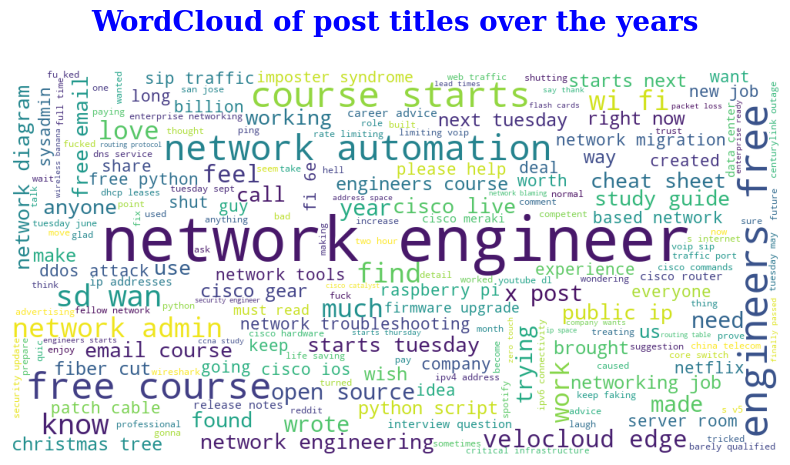

In [26]:
# WordCloud for all the words present in the posts over the years

post_title_text = ' '.join([title for title in posts_df['post_title'].str.lower()])

# collocation_threshold = 2 so that we can catch compound words
word_cloud = WordCloud(collocation_threshold=2, width=1000, height=500, 
                       background_color='white'
                       ).generate(post_title_text)

# Display the generated WordCloud
plt.figure(figsize=(10,5))
plt.imshow(word_cloud)
plt.axis("off")

# Customize the title with color and text formatting
title_text = "WordCloud of post titles over the years\n"
title_font = {'size': 20, 'weight': 'bold', 'color': 'blue', 'family': 'serif'}
plt.title(title_text, fontdict=title_font)

plt.show()

## Wordcloud post titles by year

In [27]:
selected_year = 2020

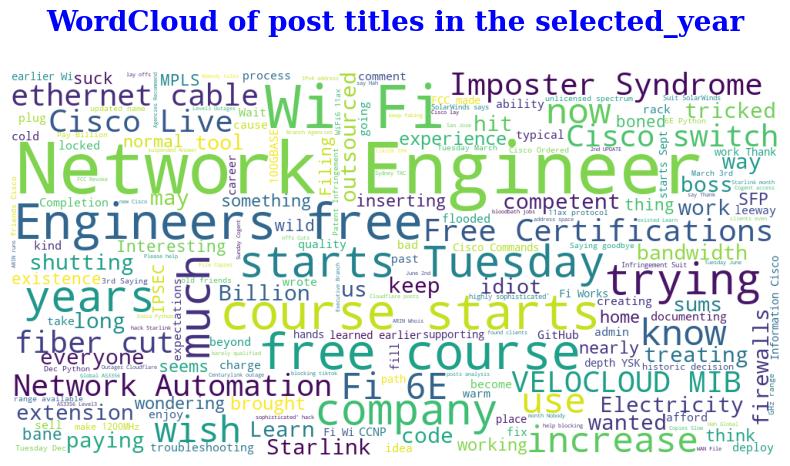

In [28]:
posts_in_year = posts_df[posts_df['created_year'] == selected_year]
posts_title_text_year = ' '.join(item for item in posts_in_year[~posts_in_year['post_title'].isna()]['post_title'])

# collocation_threshold = 2 so that we can catch compound words
word_cloud = WordCloud(collocation_threshold=2, width=1000, height=500, 
                       background_color='white'
                       ).generate(posts_title_text_year)

# Display the generated WordCloud
plt.figure(figsize=(10,5))
plt.imshow(word_cloud)
plt.axis("off")

# Customize the title with color and text formatting
title_text = "WordCloud of post titles in the selected_year\n"
title_font = {'size': 20, 'weight': 'bold', 'color': 'blue', 'family': 'serif'}
plt.title(title_text, fontdict=title_font)

plt.show()

## Sentiment Analysis

In [29]:
selected_topics = "sd-wan|sdwan"

In [30]:
# https://huggingface.co/blog/sentiment-analysis-python
# https://huggingface.co/siebert/sentiment-roberta-large-english?text=I+love+you%2C+I+don%27t+like+you.+average+value

sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

#sentiment_classifier = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english") # Need more capacity to run

In [31]:
# Sentiment analysis - restricted to 128 tokens
"""
def get_sentiment(text):
    # Get sentiment prediction scores
    try:
        sentiment = sentiment_classifier(text)[0]['label']
    except:
        sentiment = 'Not classified'
    
    return sentiment
"""

"\ndef get_sentiment(text):\n    # Get sentiment prediction scores\n    try:\n        sentiment = sentiment_classifier(text)[0]['label']\n    except:\n        sentiment = 'Not classified'\n    \n    return sentiment\n"

In [32]:
# Sentiment analysis on the given text

def get_sentiment(text):
    # Split the text into chunks of 128 characters each
    text_chunks = [text[i: i+128] for i in range(0, len(text), 128)]

    # Get sentiment prediction scores for each chunk
    pred_scores = [sentiment_classifier(chunk) for chunk in text_chunks]

    # Average the scores
    avg_scores = [max(score, key = lambda x: x['score']) ['score'] for score in pred_scores]
    avg_score = np.mean(avg_scores)

    # Get seniment with the highest average prediction score
    sentiment = max(pred_scores[0], key = lambda x: x['score']) ['label'] if avg_score > 0.5 else "Not Classified"

    return sentiment

In [33]:
#comments_posts_df_sdwan = comments_posts_df[comments_posts_df['post_title'].str.lower().contains('sd-wan|sdwan|velocloud')] # post title containing the words related to SD-WAN
#print(comments_posts_df_sdwan)


#print (selected_topic)
# Create a copy of the slice

comments_posts_df_word = comments_posts_df[comments_posts_df['post_title'].str.contains(selected_topics, case=False)].copy() #Ignore case
comments_posts_df_word

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
26756,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,2023 and we still have mass outages due to exp...
26757,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,At 11:39AM EDT this got posted in a partner ch...
26758,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,This Cisco Live should be fun!
26759,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,From OP: We upgraded the controllers to 20.6....
26760,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,It's crazy right now. It's all hands on deck f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,mpcu0e,Velocloud,1.618231e+09,Are there any pre-request for sd-wan in order ...,https://www.reddit.com/r/Velocloud/comments/mp...,Velocloud sd-wan - pre-request for Top Applica...,NaN,1,3,1.00,2021-04-12 12:30:28,2021,That is totally depend on the utilisation
344,mpcu0e,Velocloud,1.618231e+09,Are there any pre-request for sd-wan in order ...,https://www.reddit.com/r/Velocloud/comments/mp...,Velocloud sd-wan - pre-request for Top Applica...,NaN,1,3,1.00,2021-04-12 12:30:28,2021,>utilisation\n\nUtilisation of what?
345,mpcu0e,Velocloud,1.618231e+09,Are there any pre-request for sd-wan in order ...,https://www.reddit.com/r/Velocloud/comments/mp...,Velocloud sd-wan - pre-request for Top Applica...,NaN,1,3,1.00,2021-04-12 12:30:28,2021,Of course the bandwidth utilisation.
361,lsi0tn,Velocloud,1.614290e+09,I've looked at some of the technical differenc...,https://www.reddit.com/r/Velocloud/comments/ls...,Commercial terms for SD-WAN implementation,NaN,1,2,1.00,2021-02-25 21:56:39,2021,1. Likely higher than those on this list. Not...


In [34]:
# Add sentiment column for the filtered posts
comments_posts_df_word.loc[:, 'sentiment'] = comments_posts_df_word['comment'].astype(str).apply(lambda text: get_sentiment(text))
comments_posts_df_word

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment
26756,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,2023 and we still have mass outages due to exp...,NEG
26757,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,At 11:39AM EDT this got posted in a partner ch...,NEU
26758,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,This Cisco Live should be fun!,POS
26759,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,From OP: We upgraded the controllers to 20.6....,POS
26760,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,It's crazy right now. It's all hands on deck f...,NEU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,mpcu0e,Velocloud,1.618231e+09,Are there any pre-request for sd-wan in order ...,https://www.reddit.com/r/Velocloud/comments/mp...,Velocloud sd-wan - pre-request for Top Applica...,NaN,1,3,1.00,2021-04-12 12:30:28,2021,That is totally depend on the utilisation,NEU
344,mpcu0e,Velocloud,1.618231e+09,Are there any pre-request for sd-wan in order ...,https://www.reddit.com/r/Velocloud/comments/mp...,Velocloud sd-wan - pre-request for Top Applica...,NaN,1,3,1.00,2021-04-12 12:30:28,2021,>utilisation\n\nUtilisation of what?,NEU
345,mpcu0e,Velocloud,1.618231e+09,Are there any pre-request for sd-wan in order ...,https://www.reddit.com/r/Velocloud/comments/mp...,Velocloud sd-wan - pre-request for Top Applica...,NaN,1,3,1.00,2021-04-12 12:30:28,2021,Of course the bandwidth utilisation.,NEU
361,lsi0tn,Velocloud,1.614290e+09,I've looked at some of the technical differenc...,https://www.reddit.com/r/Velocloud/comments/ls...,Commercial terms for SD-WAN implementation,NaN,1,2,1.00,2021-02-25 21:56:39,2021,1. Likely higher than those on this list. Not...,NEU


In [35]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="sentiment", y="..count..", color="subreddit", fill="subreddit"), data=comments_posts_df_word, sampling="none" if comments_posts_df_word.size < 50 else sampling_pick(n=50)) + \
ggtitle("Comments Sentiment Analysis") 

In [36]:
# visualization of the sentiment distribution
from lets_plot import *
from lets_plot.mapping import *

ggplot(comments_posts_df_word) + geom_pie(aes(fill=as_discrete('sentiment', order_by='..count..')),
                                            size=28, hole=0.2, stroke=1.0,
                                            labels=layer_labels()
                                                    .line('@sentiment')
                                                    .line('(@{..prop..})')
                                                    .format('..prop..', '.2%')
                                        ) \
                              + theme(line=element_blank(), axis_text=element_blank(),
                                      axis_title=element_blank(), legend_position='none') \
                              + ggtitle('Sentiment distribution around the given topic(s)')

## Emotion Recognition

https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion?text=I+feel+a+bit+let+down

In [37]:
emotion_classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', top_k=None)

In [38]:
# Testing the model with random text

#emotion_classifier("Chocolate is Yummy")

In [39]:
# Basic get_emotion limited by 512 tokens and the comments are exceeding the limit
"""
def get_emotion(text):
    # Get emotion prediction scores
    pred_scores = emotion_classifier(text)

    # Get emotion with highest prediction score
    emotion = max(pred_scores[0], key = lambda x: x['score'])['label']

    return emotion
"""

"\ndef get_emotion(text):\n    # Get emotion prediction scores\n    pred_scores = emotion_classifier(text)\n\n    # Get emotion with highest prediction score\n    emotion = max(pred_scores[0], key = lambda x: x['score'])['label']\n\n    return emotion\n"

In [40]:
# Get the emotion with highest average prediction for the given text
def get_emotion(text):
    # Split text into chunks of 512 tokens
    text_chunks = [text[i:i + 512] for i in range(0, len(text), 512)]

    emotions = []
    for chunk in text_chunks:
        pred_scores = emotion_classifier(chunk)
        emotion = max(pred_scores[0], key = lambda x: x['score']) ['label']
        emotions.append(emotion)

    # Return the most frequently predicted emotion
    most_common_emotion = Counter(emotions).most_common(1)[0][0]
    #print(Counter(emotions))
    #print(Counter(emotions).most_common(1))
    #print(Counter(emotions).most_common(1)[0][0])
    return most_common_emotion

In [41]:
""" Testing
comments_posts_df_word_subset = comments_posts_df_word.head(30).copy()
comments_posts_df_word_subset.loc[:, 'emotion'] = comments_posts_df_word_subset['comment'].astype(str).apply(lambda text: get_emotion(text))
comments_posts_df_word_subset
"""

" Testing\ncomments_posts_df_word_subset = comments_posts_df_word.head(30).copy()\ncomments_posts_df_word_subset.loc[:, 'emotion'] = comments_posts_df_word_subset['comment'].astype(str).apply(lambda text: get_emotion(text))\ncomments_posts_df_word_subset\n"

In [42]:
comments_posts_df_word.loc[:, 'emotion'] = comments_posts_df_word['comment'].astype(str).apply(lambda text: get_emotion(text))
comments_posts_df_word

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment,emotion
26756,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,2023 and we still have mass outages due to exp...,NEG,sadness
26757,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,At 11:39AM EDT this got posted in a partner ch...,NEU,joy
26758,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,This Cisco Live should be fun!,POS,joy
26759,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,From OP: We upgraded the controllers to 20.6....,POS,sadness
26760,13dm7i8,networking,1.683714e+09,Just thought I'd put something out here for pe...,https://www.reddit.com/r/networking/comments/1...,vEdge/Viptela based SD-WAN problem impacting a...,Other,247,144,0.97,2023-05-10 10:14:32,2023,It's crazy right now. It's all hands on deck f...,NEU,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,mpcu0e,Velocloud,1.618231e+09,Are there any pre-request for sd-wan in order ...,https://www.reddit.com/r/Velocloud/comments/mp...,Velocloud sd-wan - pre-request for Top Applica...,NaN,1,3,1.00,2021-04-12 12:30:28,2021,That is totally depend on the utilisation,NEU,joy
344,mpcu0e,Velocloud,1.618231e+09,Are there any pre-request for sd-wan in order ...,https://www.reddit.com/r/Velocloud/comments/mp...,Velocloud sd-wan - pre-request for Top Applica...,NaN,1,3,1.00,2021-04-12 12:30:28,2021,>utilisation\n\nUtilisation of what?,NEU,joy
345,mpcu0e,Velocloud,1.618231e+09,Are there any pre-request for sd-wan in order ...,https://www.reddit.com/r/Velocloud/comments/mp...,Velocloud sd-wan - pre-request for Top Applica...,NaN,1,3,1.00,2021-04-12 12:30:28,2021,Of course the bandwidth utilisation.,NEU,joy
361,lsi0tn,Velocloud,1.614290e+09,I've looked at some of the technical differenc...,https://www.reddit.com/r/Velocloud/comments/ls...,Commercial terms for SD-WAN implementation,NaN,1,2,1.00,2021-02-25 21:56:39,2021,1. Likely higher than those on this list. Not...,NEU,joy


In [43]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="emotion", y="..count..", color="subreddit", fill="subreddit"), data=comments_posts_df_word, sampling="none" if comments_posts_df_word.size < 50 else sampling_pick(n=50)) + \
ggtitle("Emotions classification chart for the given topic") 

In [44]:
# Combine all posts and comments and save to a text file
comments_posts_df_tmp = comments_posts_df[['post_title', 'selftext','comment']].astype(str)
agg_comments = comments_posts_df_tmp.groupby(['post_title', 'selftext'])['comment'].apply('. '.join).reset_index()
agg_comments

,post_title,selftext,comment
0,"""All Systems Down"" One of the worst health-car...",Looking for info about STP I came across this ...,Having just left a massive network consisting ...
1,"""Microscopic level"" technical question. How do...",**TL;DR:** How does a network-connected device...,[deleted]. >Is there some sort of established ...
2,"""New world"" networking is so overwhelming. Tips?",I work as a network engineer in a very traditi...,[deleted]. What problem(s) does your managemen...
3,"""Oh Cisco Tree, Oh Cisco Tree...""",The office has been a little quiet over the la...,Trees just keep getting more expensive every y...
4,"""Thrangrycat"" - Cisco's latest vulnerability",https://thrangrycat.com/\n\nI'm not super fami...,Joke's on them. All my Cisco gear is pre-2006...
...,...,...,...
1097,taking a sysadmin and developer to school - no...,"nobody did anything wrong, ever.",This story shows the importance of knowing mor...
1098,"the CD-ROM is dead, the USB type C will replac...","I mean, the tech world is in constant evolutio...",There is still brand new equipment being sold ...
1099,vEdge/Viptela based SD-WAN problem impacting a...,Just thought I'd put something out here for pe...,2023 and we still have mass outages due to exp...
1100,~3500 Flash Cards for CCIE R&S v5.1,nan,Just another reason I have so much respect for...


In [45]:
# Joining all 3 columns(title, body, comments) together into a single column to save to a file
agg_comments['combined_text'] = agg_comments.astype(str).agg('. '.join, axis=1)
all_text = ' '.join(agg_comments['combined_text'])

In [46]:

# ONLY NEED TO RUN AND SAVE TO A FILE ONCE

"""
# Save text to txt file
f = open("/data/notebook_files/textdata/all_text_reddit.txt", "w") 
f.write(all_text)
f.close()
"""

'\n# Save text to txt file\nf = open("/data/notebook_files/textdata/all_text_reddit.txt", "w") \nf.write(all_text)\nf.close()\n'

## Chatbot (chatGPT API + Reddit data)
- Context learning - passing large context data using llama-index(aka GPTindex) package
- Another indexing that could be used: LangChain (Agents)

In [47]:
# Import modules from llama_index and langchain
from llama_index import SimpleDirectoryReader, GPTVectorStoreIndex, LLMPredictor, PromptHelper, StorageContext, load_index_from_storage
from langchain.chat_models import ChatOpenAI
from IPython.display import Markdown, display

In [48]:
# Adapted based on LlamaIndex documentation https://gpt-index.readthedocs.io/en/latest/index.html
# and simpleIndex - https://gpt-index.readthedocs.io/en/latest/examples/vector_stores/SimpleIndexDemo.html
# and Dan Shipper's work here: https://www.lennysnewsletter.com/p/i-built-a-lenny-chatbot-using-gpt
# modified to use GPTVectorStoreIndex() new API
# llama index video - https://www.youtube.com/watch?v=FQBou-YgxyE

def construct_index(directory_path):
    # set maximum input size
    max_input_size = 4096
    # set number of output tokens
    num_outputs = 256
    # set maximum chunk overlap
    max_chunk_overlap = 0.2 # 20% overlap
    # set chunk size limit
    chunk_size_limit = 600

    # define LLM (ChatGPT gpt-3.5-turbo)
    llm_predictor = LLMPredictor(llm=ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo", max_tokens=num_outputs))
    prompt_helper = PromptHelper(max_input_size, num_outputs, max_chunk_overlap, chunk_size_limit=chunk_size_limit)
 
    documents = SimpleDirectoryReader(directory_path).load_data()
    
    index = GPTVectorStoreIndex.from_documents(documents, llm_predictor=llm_predictor, prompt_helper=prompt_helper)

    # Save the index to disk
    index.storage_context.persist('/data/notebook_files/')

    return index

In [49]:
api_key = "sk-xxxx"

In [50]:
# Set OpenAI key
import os
os.environ["OPENAI_API_KEY"] = api_key

In [51]:
# Construct our index (ONLY NEED TO RUN ONCE! BE CAREFUL THAT THIS COSTS MONEY)
# This will take every file in folder, split it into chunks, and embed it with OpenAI's embeddings API. 

"""
construct_index('/data/notebook_files/textdata')
"""

"\nconstruct_index('/data/notebook_files/textdata')\n"

In [52]:
# testing if api_key is working correctly
import openai

openai.api_key = os.environ['OPENAI_API_KEY'] # Replace with your OpenAI API key

response = openai.Completion.create(
  engine="text-davinci-002",
  prompt="Translate the following English text to French: '{}'",
  max_tokens=60
)

print(response.choices[0].text.strip())

Je ne sais pas ce que je dois faire.

I don't know what I'm supposed to do.


In [53]:
# Answer question based on the provided context from llamaindex + GPT LLM
def ask_chatbot(question):
    # Rebuild storage context
    storage_context = StorageContext.from_defaults(persist_dir='/data/notebook_files/')  # since you saved in the current directory with 'index.json'
    
    api_key = os.environ['OPENAI_API_KEY'] 

    # Load the index
    index = load_index_from_storage(storage_context)

    # Create the query engine
    query_engine = index.as_query_engine()

    # Query the index
    response = "My apologies! I hit an error and couldn't answer your question. :-("
    try:
        response = query_engine.query(question)
    except Exception as e:
        print("Response Error: ", e)
            

    display(Markdown(f"Question: <b>{question}</b>"))
    display(Markdown(f"Response: <b>{response.response}</b>"))

In [54]:
# https://levelup.gitconnected.com/connecting-chatgpt-with-your-own-data-using-llamaindex-663844c06653
from llama_index import StorageContext, load_index_from_storage

def my_chatGPT_bot(input_text):
    # load the index from vector_store.json
    storage_context = StorageContext.from_defaults(persist_dir="/data/notebook_files/")
    index = load_index_from_storage(storage_context)

    # create a query engine to ask question
    query_engine1 = index.as_query_engine()
    response1 = query_engine1.query(input_text)
    return response1.response

In [55]:
question = "What is Velocloud SDWAN and how is it better than it's competetitors?"

In [56]:
# Run chatbot - Q&A

ask_chatbot(question)

Question: <b>What is Velocloud SDWAN and how is it better than it's competetitors?</b>

Response: <b>
Velocloud SDWAN is a software-defined wide area network (SD-WAN) solution that provides centralized management and coordination for hybrid WANs. It offers features such as traffic routing based on business needs, firewalls, user identity controls, network segmentation, and other security features. Velocloud SDWAN is better than its competitors because it provides better performance, cost savings, and improved flexibility. It also offers faster support response times than other solutions. Additionally, Velocloud SDWAN provides a more comprehensive security stack than other solutions, allowing for better segmentation of traffic and more control over visitor traffic.</b>